In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA


In [3]:
data.shape

(891, 12)

In [4]:
data['Pclass'].unique()

array([3, 1, 2])

In [5]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
duplicates=data[data.duplicated()]

In [12]:
print("Duplicate rows:\n",duplicates)

Duplicate rows:
 Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


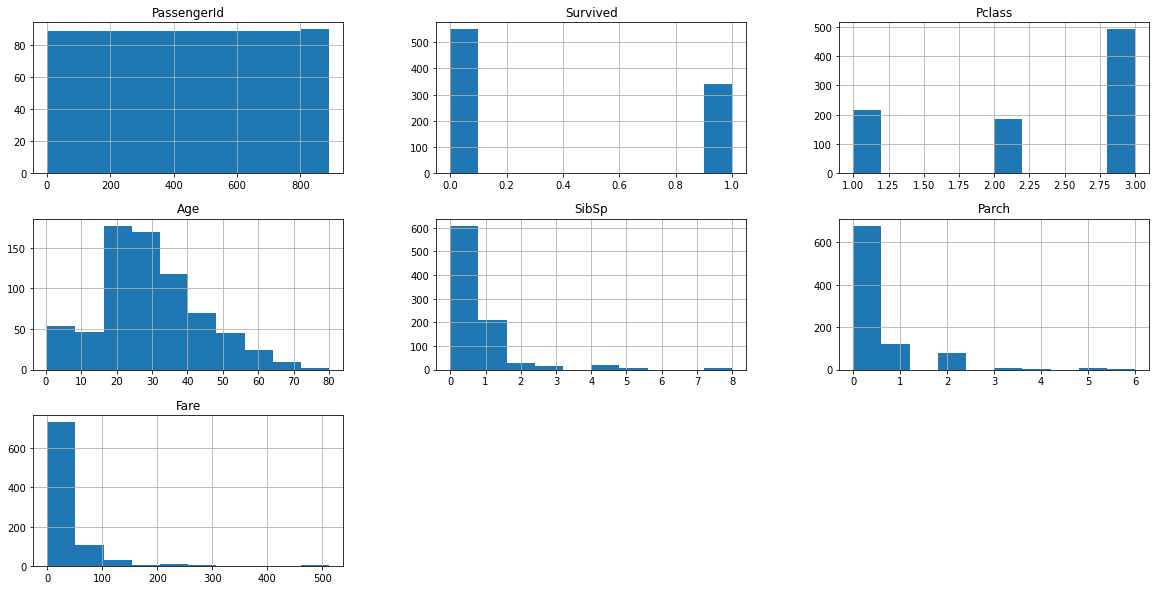

In [13]:
freqgraph = data.select_dtypes(include=['float','int','object'],)
freqgraph.hist(figsize=(20,10))
plt.show()

# Treating missing values

In [14]:
#We are dropping cabin from the above data set since it have 687 missing values
data.drop('Cabin',axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
#We are dropping passengerid from the above dataset since it is unique for each passenger
data.drop('PassengerId',axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
#We are dropping ticket from the above dataset since it is unique for each passenger
data.drop('Ticket',axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [17]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking S:")
s=data[data["Embarked"] == "S"].shape[0]
print(s)

print("Number of people embarking in C:")
c=data[data["Embarked"] == "C"].shape[0]
print(c)

print("Number of people embarking in Q:")
q=data[data["Embarked"] == "Q"].shape[0]
print(q)

nan=data[data['Embarked'] == "nan"].shape[0]
print("nan values:",nan)

Number of people embarking S:
644
Number of people embarking in C:
168
Number of people embarking in Q:
77
nan values: 0


In [18]:
#replacing the missing values in the Embarked feature with S
data=data.fillna({"Embarked": "S"})

In [19]:
data.Embarked.isna().sum()

0

In [20]:
mea_age=data['Age'].median()
data.Age.fillna(mea_age,inplace=True)

In [21]:
data.Age.isna().sum()

0

In [22]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
data['Name']=lr.fit_transform(data['Name'])
data['Sex']=lr.fit_transform(data['Sex'])
data['Embarked']=lr.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,108,1,22.0,1,0,7.2500,2
1,1,1,190,0,38.0,1,0,71.2833,0
2,1,3,353,0,26.0,0,0,7.9250,2
3,1,1,272,0,35.0,1,0,53.1000,2
4,0,3,15,1,35.0,0,0,8.0500,2


In [24]:
data.corr()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Name,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,-0.049173,-0.006117
Sex,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,-0.006117,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


<Axes: >

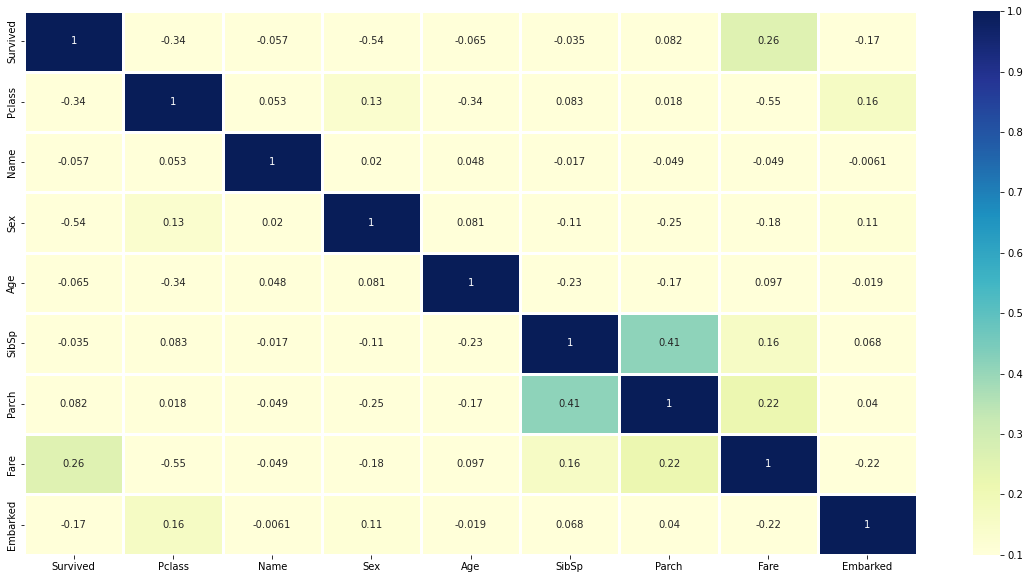

In [25]:
#plotting correlation matrix
plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=0.1,vmax=1,linewidth=3,cmap='YlGnBu')

# Treating Outliers

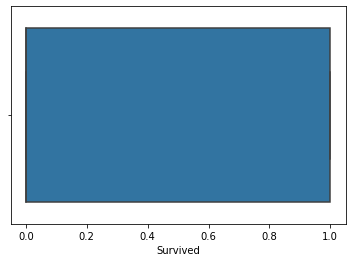

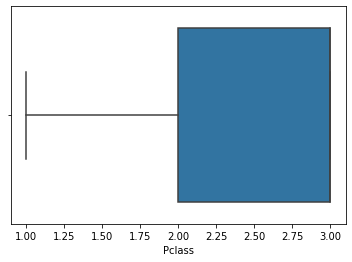

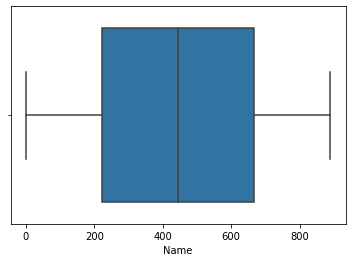

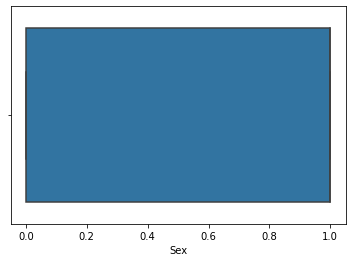

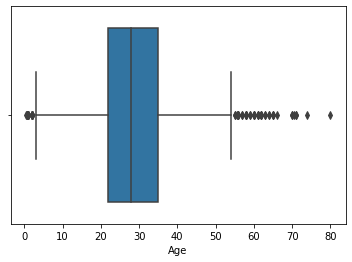

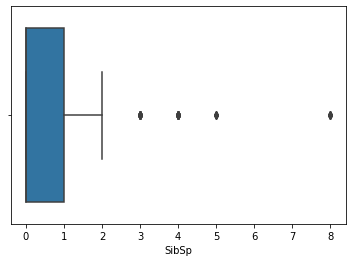

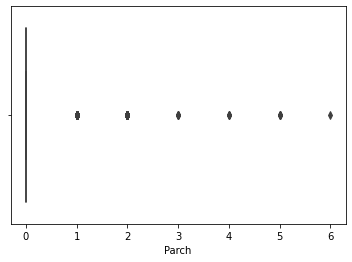

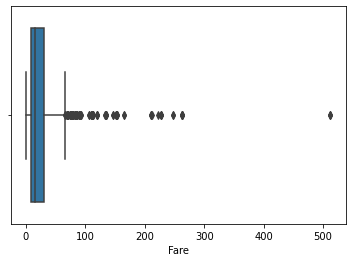

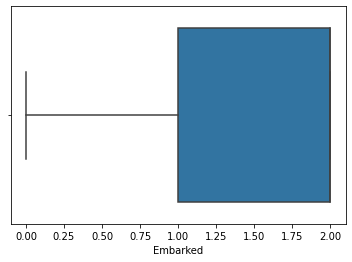

In [26]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

In [27]:
from scipy import stats

In [28]:
IQR = stats.iqr(data.Age,interpolation='midpoint')
IQR

13.0

In [29]:
Q1=data.Age.quantile(0.25)
Q3=data.Age.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.5, 54.5)

In [30]:
data.loc[data.Age<min_limit]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,624,1,2.00,3,1,21.0750,2
16,0,3,682,1,2.00,4,1,29.1250,1
78,1,2,127,1,0.83,0,2,29.0000,2
119,0,3,24,0,2.00,4,2,31.2750,2
164,0,3,628,1,1.00,4,1,39.6875,2
172,1,3,408,0,1.00,1,1,11.1333,2
183,1,2,76,1,1.00,2,1,39.0000,2
205,0,3,789,0,2.00,0,1,10.4625,2
297,0,1,17,0,2.00,1,2,151.5500,2
305,1,1,16,1,0.92,1,2,151.5500,2


In [31]:
data.loc[data.Age>max_limit]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
11,1,1,95,0,58.0,0,0,26.5500,2
15,1,2,359,0,55.0,0,0,16.0000,2
33,0,2,856,1,66.0,0,0,10.5000,2
54,0,1,620,1,65.0,0,1,61.9792,0
94,0,3,184,1,59.0,0,0,7.2500,2
96,0,1,292,1,71.0,0,0,34.6542,0
116,0,3,178,1,70.5,0,0,7.7500,1
152,0,3,532,1,55.5,0,0,8.0500,2
170,0,1,832,1,61.0,0,0,33.5000,2
174,0,1,769,1,56.0,0,0,30.6958,0


In [32]:
data.loc[data['Age']>max_limit,'Age']=np.median(data.Age)

In [33]:
data.loc[data.Age>max_limit]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [34]:
IQR = stats.iqr(data.SibSp,interpolation='midpoint')
IQR

Q1=data.SibSp.quantile(0.25)
Q3=data.SibSp.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1.5, 2.5)

In [35]:
data.loc[data.SibSp<min_limit]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [36]:
data.loc[data.SibSp>max_limit]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,624,1,2.0,3,1,21.0750,2
16,0,3,682,1,2.0,4,1,29.1250,1
24,0,3,626,0,8.0,3,1,21.0750,2
27,0,1,260,1,19.0,3,2,263.0000,2
50,0,3,629,1,7.0,4,1,39.6875,2
59,0,3,299,1,11.0,5,2,46.9000,2
63,0,3,755,1,4.0,3,2,27.9000,2
68,1,3,25,0,17.0,4,2,7.9250,2
71,0,3,300,0,16.0,5,2,46.9000,2
85,1,3,52,0,33.0,3,0,15.8500,2


In [37]:
data.loc[data['SibSp']>max_limit,'SibSp']=np.median(data.SibSp)

In [38]:
data.loc[data.SibSp>max_limit]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [39]:
IQR = stats.iqr(data.Fare,interpolation='midpoint')
IQR

Q1=data.Fare.quantile(0.25)
Q3=data.Fare.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-26.724, 65.6344)

In [40]:
data.loc[data.Fare<min_limit]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [41]:
data.loc[data.Fare>max_limit]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,190,0,38.0,1,0,71.2833,0
27,0,1,260,1,19.0,0,2,263.0000,2
31,1,1,776,0,28.0,1,0,146.5208,0
34,0,1,535,1,28.0,1,0,82.1708,0
52,1,1,333,0,49.0,1,0,76.7292,0
...,...,...,...,...,...,...,...,...,...
846,0,3,720,1,28.0,0,2,69.5500,2
849,1,1,291,0,28.0,1,0,89.1042,0
856,1,1,860,0,45.0,1,1,164.8667,2
863,0,3,718,0,28.0,0,2,69.5500,2


In [42]:
data.loc[data['Fare']>max_limit,'Fare']=np.median(data.Fare)

In [43]:
data.loc[data.Fare>max_limit]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


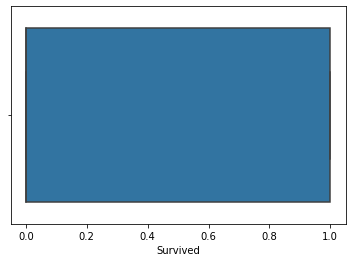

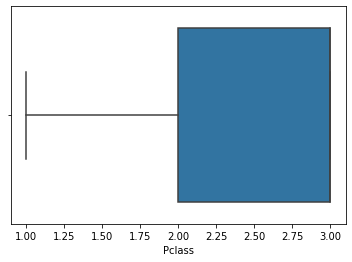

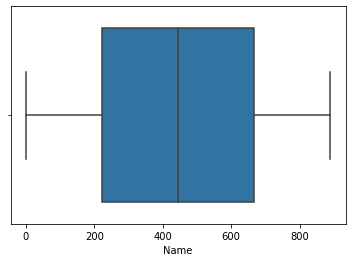

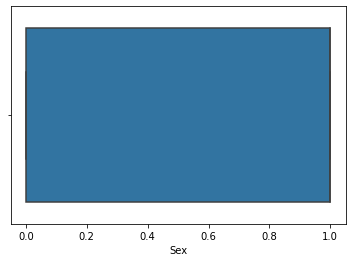

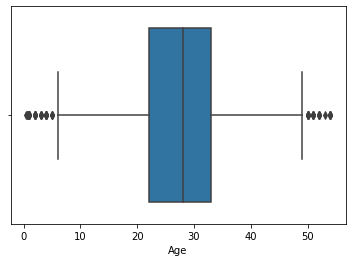

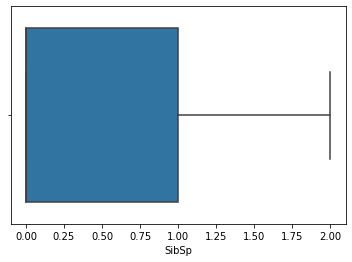

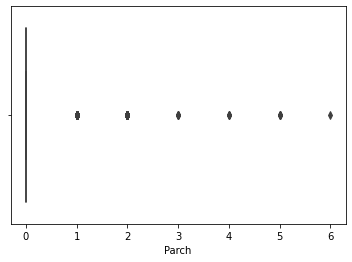

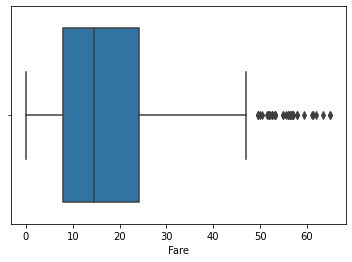

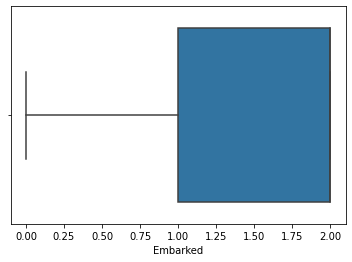

In [44]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

In [45]:
X=data.drop('Survived',axis=1)
y=data['Survived']

# Training and Testing

In [46]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# SVM 

In [47]:
#svm linear kernel
from sklearn.svm import SVC
svmclf_lin=SVC(kernel='linear')
svmclf_lin.fit(X_train,y_train)

SVC(kernel='linear')

In [48]:
y_pred_svm_lin=svmclf_lin.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [50]:
print('Accuracy :',accuracy_score(y_test,y_pred_svm_lin))

Accuracy : 0.7821229050279329


In [51]:
#svm polynomial kernel
svmclf_pol=SVC(kernel='poly')
svmclf_pol.fit(X_train,y_train)

SVC(kernel='poly')

In [52]:
y_pred_svm_pol=svmclf_pol.predict(X_test)

In [53]:
print('Accuracy :',accuracy_score(y_test,y_pred_svm_pol))

Accuracy : 0.7932960893854749


In [54]:
#svm rbf kernel
svmclf_rbf=SVC(kernel='rbf')
svmclf_rbf.fit(X_train,y_train)

SVC()

In [55]:
y_pred_svm_rbf=svmclf_rbf.predict(X_test)

In [56]:
print('Accuracy :',accuracy_score(y_test,y_pred_svm_rbf))

Accuracy : 0.8156424581005587


# kNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  model=classifier.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [58]:
metric_k

[0.8044692737430168,
 0.7877094972067039,
 0.8100558659217877,
 0.8212290502793296,
 0.8100558659217877,
 0.7821229050279329,
 0.7932960893854749,
 0.7877094972067039,
 0.770949720670391,
 0.7877094972067039,
 0.7653631284916201,
 0.7821229050279329]

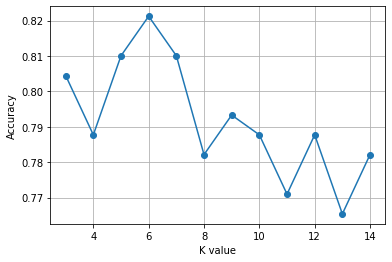

In [59]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [60]:
classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
model=classifier.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [61]:
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.7821229050279329


# K-fold Cross Validation

In [62]:
from sklearn.model_selection import KFold

In [63]:
#change the given data into 10 subsets of data
kfold_validator = KFold(10)

In [64]:
for train_index,test_index in kfold_validator.split(X,y):
    print('Training index :',train_index)
    print('Testing index :',test_index)

Training index : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
cv_score_lin = cross_val_score(svmclf_lin,X,y,cv=kfold_validator)
cv_score_lin

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.7752809 ])

In [67]:
cv_score_lin.mean()

0.787852684144819

In [68]:
cv_score_pol = cross_val_score(svmclf_pol,X,y,cv=kfold_validator)
cv_score_pol

array([0.56666667, 0.7752809 , 0.61797753, 0.49438202, 0.58426966,
       0.64044944, 0.56179775, 0.62921348, 0.66292135, 0.62921348])

In [69]:
cv_score_pol.mean()

0.6162172284644194

In [70]:
cv_score_rbf = cross_val_score(svmclf_rbf,X,y,cv=kfold_validator)
cv_score_rbf

array([0.56666667, 0.7752809 , 0.61797753, 0.49438202, 0.58426966,
       0.64044944, 0.56179775, 0.62921348, 0.66292135, 0.62921348])

In [71]:
cv_score_rbf.mean()

0.6162172284644194

In [72]:
cv_score_knn = cross_val_score(classifier,X,y,cv=kfold_validator)
cv_score_knn

array([0.58888889, 0.73033708, 0.65168539, 0.48314607, 0.59550562,
       0.6741573 , 0.60674157, 0.65168539, 0.53932584, 0.65168539])

In [73]:
cv_score_knn.mean()

0.6173158551810237

# Stratified k-fold Cross Validation

In [74]:
from sklearn.model_selection import StratifiedKFold

In [75]:
skfold_validator=StratifiedKFold(n_splits=10)

In [76]:
for train_index,test_index in skfold_validator.split(X,y):
    print('Training index :',train_index)
    print('Testing index :',test_index)

Training index : [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [77]:
skcv_score_lin=cross_val_score(svmclf_lin,X,y,cv=skfold_validator)
skcv_score_lin

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [78]:
skcv_score_lin.mean()

0.786729088639201

In [79]:
skcv_score_pol=cross_val_score(svmclf_lin,X,y,cv=skfold_validator)
skcv_score_pol

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [80]:
skcv_score_pol.mean()

0.786729088639201

In [81]:
skcv_score_rbf=cross_val_score(svmclf_lin,X,y,cv=skfold_validator)
skcv_score_rbf

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [82]:
skcv_score_rbf.mean()

0.786729088639201

In [83]:
skcv_score_knn=cross_val_score(classifier,X,y,cv=skfold_validator)
skcv_score_knn

array([0.62222222, 0.60674157, 0.59550562, 0.57303371, 0.61797753,
       0.65168539, 0.64044944, 0.68539326, 0.5505618 , 0.62921348])

In [84]:
skcv_score_knn.mean()

0.6172784019975031